In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from collections import Counter
from sklearn.metrics import mean_squared_error
import scipy as scipy
import math
import itertools

In [3]:
df = pd.read_csv('../data.csv', sep=';')
df.head()

,X,Y
0,4,15
1,5,7
2,7,15
3,8,10
4,10,10


<AxesSubplot:xlabel='X', ylabel='Y'>

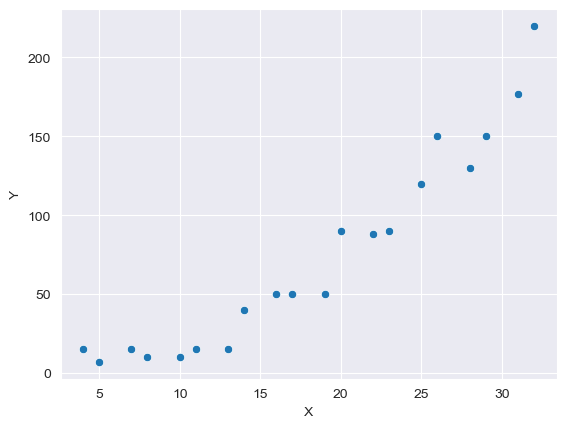

In [4]:
sns.scatterplot(data=df, x = 'X', y = 'Y')

<AxesSubplot:xlabel='Y', ylabel='Count'>

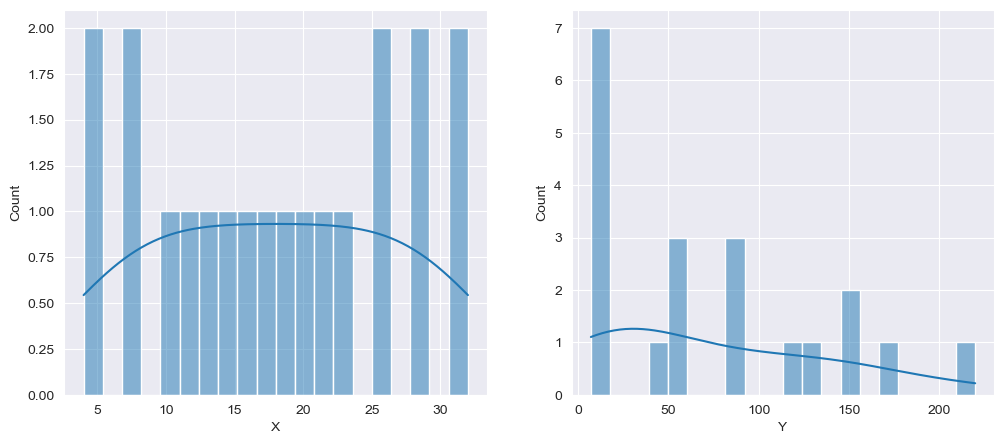

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
sns.histplot(df['X'], bins=20, ax=axs[0], kde=True)
sns.histplot(df['Y'], bins=20, ax=axs[1], kde=True)

In [6]:
sd_X = np.std(df['X'], ddof=1)
sd_Y = np.std(df['Y'], ddof=1)

central_moment_X_3 = scipy.stats.moment(df['X'], moment=3)
central_moment_X_4 = scipy.stats.moment(df['X'], moment=4)
central_moment_Y_3 = scipy.stats.moment(df['Y'], moment=3)
central_moment_Y_4 = scipy.stats.moment(df['Y'], moment=4)

As_X = central_moment_X_3/sd_X**3
As_Y = central_moment_Y_3/sd_Y**3
Ex_X = central_moment_X_4/sd_X**4 - 3
Ex_Y = central_moment_Y_4/sd_Y**4 - 3

m = [{
        'As_X': round(As_X, 3),
        'As_Y': round(As_Y, 3),
    },
    {
        'Ex_X': round(Ex_X, 3),
        'Ex_Y': round(Ex_Y, 3),
    },
    {
        'sd_X': round(sd_X, 3),
        'sd_Y': round(sd_Y, 3)
    }
]

print(min(df.X), max(df.X))

print(m)

4 32
[{'As_X': 0.0, 'As_Y': 0.653}, {'Ex_X': -1.39, 'Ex_Y': -0.844}, {'sd_X': 8.856, 'sd_Y': 64.449}]


In [7]:
df[['Y', 'X']].corr()

,Y,X
Y,1.000000,0.946804
X,0.946804,1.000000


In [8]:
n = len(df.X)
group_int_number = round(3.322 * math.log(n, 10) + 1)

cut_X = pd.cut(df.X, bins=group_int_number)
cut_Y = pd.cut(df.Y, bins=group_int_number)
df['cut_X'] = cut_X
df['cut_Y'] = cut_Y

print(group_int_number)
df.head()

5


,X,Y,cut_X,cut_Y
0,4,15,"(3.972, 9.6]","(6.787, 49.6]"
1,5,7,"(3.972, 9.6]","(6.787, 49.6]"
2,7,15,"(3.972, 9.6]","(6.787, 49.6]"
3,8,10,"(3.972, 9.6]","(6.787, 49.6]"
4,10,10,"(9.6, 15.2]","(6.787, 49.6]"


In [9]:
CorrTable_df = pd.crosstab(
    index=df['cut_X'],
    columns=df['cut_Y'],
    rownames=['cut_X'],
    colnames=['cut_Y'])

CorrTable_df

cut_Y,"(6.787, 49.6]","(49.6, 92.2]","(92.2, 134.8]","(134.8, 177.4]","(177.4, 220.0]"
cut_X,,,,,
"(3.972, 9.6]",4,0,0,0,0
"(9.6, 15.2]",4,0,0,0,0
"(15.2, 20.8]",0,4,0,0,0
"(20.8, 26.4]",0,2,1,1,0
"(26.4, 32.0]",0,0,1,2,1


In [10]:
CorrTable_np = np.array(CorrTable_df)
print(CorrTable_np, type(CorrTable_np))

[[4 0 0 0 0]
 [4 0 0 0 0]
 [0 4 0 0 0]
 [0 2 1 1 0]
 [0 0 1 2 1]] <class 'numpy.ndarray'>


In [11]:
# итоги по строкам
n_group_X = [np.sum(CorrTable_np[i]) for i in range(group_int_number)]
print(f"n_group_X = {n_group_X}")

# итоги по столбцам
n_group_Y = [np.sum(CorrTable_np[:,j]) for j in range(group_int_number)]
print(f"n_group_Y = {n_group_Y}")

n_group_X = [4, 4, 4, 4, 4]
n_group_Y = [8, 6, 2, 3, 1]


In [12]:
# Среднегрупповые значения переменной X
Xboun_mean = [(CorrTable_df.index[i].left + CorrTable_df.index[i].right)/2 for i in range(group_int_number)]
Xboun_mean[0] = (np.min(df.X) + CorrTable_df.index[0].right)/2    # исправляем значения в крайних интервалах
Xboun_mean[group_int_number-1] = (CorrTable_df.index[group_int_number-1].left + np.max(df.X))/2
print(f"Xboun_mean = {Xboun_mean}")

# Среднегрупповые значения переменной Y
Yboun_mean = [(CorrTable_df.columns[j].left + CorrTable_df.columns[j].right)/2 for j in range(group_int_number)]
Yboun_mean[0] = (np.min(df.Y) + CorrTable_df.columns[0].right)/2    # исправляем значения в крайних интервалах
Yboun_mean[group_int_number-1] = (CorrTable_df.columns[group_int_number-1].left + np.max(df.Y))/2
print(f"Yboun_mean = {Yboun_mean}", '\n')

Xmean_group = [np.sum(CorrTable_np[:,j] * Xboun_mean) / n_group_Y[j] for j in range(group_int_number)]
print(f"Xmean_group = {Xmean_group}")

Ymean_group = [np.sum(CorrTable_np[i] * Yboun_mean) / n_group_X[i] for i in range(group_int_number)]
print(f"Ymean_group = {Ymean_group}")

Xboun_mean = [6.8, 12.399999999999999, 18.0, 23.6, 29.2]
Yboun_mean = [28.3, 70.9, 113.5, 156.10000000000002, 198.7] 

Xmean_group = [9.6, 19.866666666666667, 26.4, 27.333333333333332, 29.2]
Ymean_group = [28.3, 28.3, 70.9, 102.85000000000001, 156.10000000000002]


In [13]:
Sum2_total_X = 0
for index, i in enumerate(n_group_X):
    Sum2_total_X += i * ((Xboun_mean[index] - np.mean(df.X))**2)

Sum2_total_Y = 0
for index, i in enumerate(n_group_Y):
    Sum2_total_Y += i * ((Yboun_mean[index] - np.mean(df.Y))**2)

print(f"Sum2_total_X = {Sum2_total_X}")
print(f"Sum2_total_Y = {Sum2_total_Y}")

Sum2_total_X = 1254.4
Sum2_total_Y = 55585.640000000014


In [14]:
Sum2_between_group_X = 0
for index, i in enumerate(n_group_X):
    Sum2_between_group_X += i * (Xmean_group[index] - np.mean(df.X))**2

Sum2_between_group_Y = 0
for index, i in enumerate(n_group_Y):
    Sum2_between_group_Y += i * (Ymean_group[index] - np.mean(df.Y))**2

print(f"Sum2_between_group_X = {Sum2_between_group_X}")
print(f"Sum2_between_group_Y = {Sum2_between_group_Y}")

Sum2_between_group_X = 1428.622222222222
Sum2_between_group_Y = 39075.47750000001


In [15]:
print(f"Sum2_within_group_X = {Sum2_total_X - Sum2_between_group_X}")
print(f"Sum2_within_group_Y = {Sum2_total_Y - Sum2_between_group_Y}")

Sum2_within_group_X = -174.22222222222194
Sum2_within_group_Y = 16510.162500000006


In [16]:
corr_ratio_XY = np.sqrt(Sum2_between_group_Y / Sum2_total_Y)
print(f"corr_ratio_XY = {corr_ratio_XY}")

corr_ratio_YX = np.sqrt(Sum2_between_group_X / Sum2_total_X)
print(f"corr_ratio_YX = {corr_ratio_YX}")

corr_ratio_XY = 0.8384377844525074
corr_ratio_YX = 1.0671873729054746


In [17]:
def Cheddock_scale_check(r, name='r'):
    # задаем шкалу Чеддока
    Cheddock_scale = {
        f'no correlation (|{name}| <= 0.1)':    0.1,
        f'very weak (0.1 < |{name}| <= 0.2)':   0.2,
        f'weak (0.2 < |{name}| <= 0.3)':        0.3,
        f'moderate (0.3 < |{name}| <= 0.5)':    0.5,
        f'perceptible (0.5 < |{name}| <= 0.7)': 0.7,
        f'high (0.7 < |{name}| <= 0.9)':        0.9,
        f'very high (0.9 < |{name}| <= 0.99)':  0.99,
        f'functional (|{name}| > 0.99)':        1.0}

    conclusion_Cheddock_scale = 0
    r_scale = list(Cheddock_scale.values())
    for i, elem in enumerate(r_scale):
        if abs(r) <= elem:
            conclusion_Cheddock_scale = list(Cheddock_scale.keys())[i]
            break
    return conclusion_Cheddock_scale

In [18]:
print(f"Оценка тесноты корреляции по шкале Чеддока: {Cheddock_scale_check(corr_ratio_XY, name=chr(951))}")

Оценка тесноты корреляции по шкале Чеддока: high (0.7 < |η| <= 0.9)


In [19]:
df[['Y', 'X']].corr()['Y']['X']

0.9468042339065116

In [20]:
acumm = 0

sd_X = np.std(df.X, ddof=1)
sd_Y = np.std(df.Y, ddof=1)
print(sd_X)
print(sd_Y)


for x, y in itertools.product(df.X, df.Y):
    acumm = acumm + (20 * x * y - 20 * round((np.mean(df.X))) * round((np.mean(df.Y))))

# print(sum(n * df.X * df.Y - n * np.mean(df.X) * np.mean(df.Y)))

# print(acumm/(n * sd_X * sd_Y))

# print(n * sd_X * sd_Y)

# print(f'sd_X = {sd_X}')
# print(f'sd_Y = {sd_Y}')

8.855566194861792
64.44859232467051


In [21]:
X = []
Y = []

In [22]:
print(X)
print(Y)

[]
[]


In [23]:
sd_X = np.std(X, ddof=1)
sd_Y = np.std(Y, ddof=1)
r = np.corrcoef(X, Y)[1][0]
print(f'sd_X = {sd_X}')
print(f'sd_Y = {sd_Y}')
print(f'r = {r}')

sd_X = nan
sd_Y = nan
r = nan


/Users/home/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/home/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/home/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/home/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/home/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/home/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees 

In [24]:
mean_Y = np.mean(Y)
mean_X = np.mean(X)

a = r * (sd_Y/sd_X)
b = mean_Y - (r * (sd_Y/sd_X) * mean_X)
print(f'y = {round(a,2)} * x + {round(b,2)}')

y = nan * x + nan


/Users/home/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/home/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
y_pred = []
for x in X:
    y_pred.append(a*x + b)
mse = mean_squared_error(Y, y_pred)
print(mse)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [ ]:
df = pd.DataFrame({
    'X':X,
    'Y':Y,
    'y_pred':y_pred
})
ax = sns.relplot(kind='scatter', x='X', y='Y', data=df, height=4, aspect=1.5)
ax.map_dataframe(sns.lineplot, x='X', y='y_pred', color='green', label='mse = '+str(mse))
plt.legend()
plt.show()

In [ ]:
sns.histplot(Y, bins=20, kde=True).set_title('X')